In [1]:
# Библиотеки
# Реализация всех структур
import numpy as np

# Датасеты для первичной проверки качества моделей
from sklearn.datasets import make_blobs, make_circles
# classification_report
from sklearn.metrics import classification_report

# Графики и визуализация
from matplotlib import pyplot as plt

# Распаковка CIFAR-10
import pickle

# Для отображения структуры скачанных данных
import glob

# Чтобы засекать время работы алгоритма
import time

# Чтобы перезагружать библиотеку
import importlib

import sys
import os


# sys.path.append("/Users/somov-od/Documents/Teaching/DL/notebooks/Numpy Network/Numpy_NN/src")
sys.path.append(os.path.join(os.getcwd(), "src"))

from dataset.dataloader import Dataloader
from nn.module.sequential import Sequential
from nn.layers.linear import Linear
# from nn.layers.batch_norm import BatchNorm
from nn.activations.relu import ReLU
from optimization.adam_optimizer import Adam
from optimization.gd_optimizer import GD
from nn.loss_functions.mse_loss import mse_loss
from nn.loss_functions.hinge_loss import hinge_loss
import visualization_utils as viz_utils

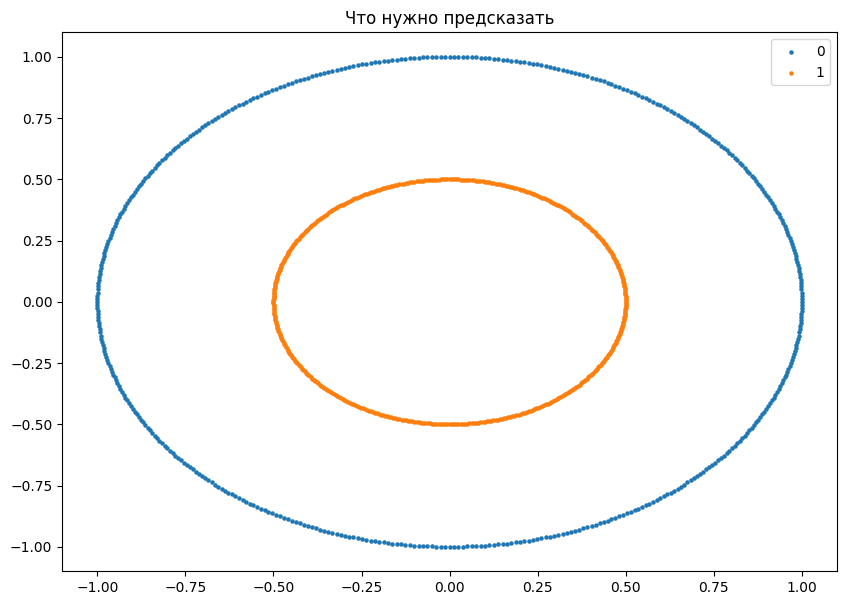

In [2]:
# Установим seed для воспроизводимости
np.random.seed(42)
dataset = make_circles(1000, factor=0.5, random_state=42)

X = dataset[0]
y = dataset[1]

plt.figure(figsize=(10, 7))

colors = ('tab:blue', 'tab:orange')

for ind, cls in enumerate(sorted(set(y))):
    plt.scatter(X[y == cls][:, 0], X[y == cls][:, 1], s=5, 
                label=str(cls), c=colors[ind])

plt.title('Что нужно предсказать')
plt.legend()
plt.show()

In [5]:
np.random.seed(42)
dataset = make_circles(1000, factor=0.5, random_state=42)

X = dataset[0]
y = dataset[1]

model = Sequential(
    Linear(2, 20),
    ReLU(),
    Linear(20, 10),
    ReLU(),
    Linear(10, 4),
    ReLU(),
    Linear(4, 1)
)

optimizer = Adam(model.parameters(), 0.01)

for epoch in range(10):
    out = model.forward(X)

    loss = hinge_loss(out, y.reshape((-1, 1)))
    print(loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

IndexError: index 1 is out of bounds for axis 1 with size 1

In [5]:
out

[[0.53937826]
 [0.34264108]
 [0.34276486]
 [0.36451333]
 [0.70390574]
 [0.32389116]
 [0.44445123]
 [0.50407006]
 [0.40346751]
 [0.41767507]
 [0.32743829]
 [0.60314924]
 [0.41161428]
 [0.3087391 ]
 [0.36384606]
 [0.45902017]
 [0.51356742]
 [0.43697934]
 [0.3393139 ]
 [0.53083507]
 [0.64408835]
 [0.38185186]
 [0.69769915]
 [0.56570723]
 [0.47402659]
 [0.49730641]
 [0.5586666 ]
 [0.28232804]
 [0.44959547]
 [0.35813011]
 [0.53182907]
 [0.40544315]
 [0.4607209 ]
 [0.39879451]
 [0.69060407]
 [0.4791168 ]
 [0.31509435]
 [0.49282029]
 [0.45278763]
 [0.77449194]
 [0.50250711]
 [0.550715  ]
 [0.54367902]
 [0.30659968]
 [0.5299195 ]
 [0.51060316]
 [0.37739483]
 [0.48631294]
 [0.60749358]
 [0.29259932]
 [0.56913729]
 [0.4275088 ]
 [0.48921431]
 [0.52575182]
 [0.53700471]
 [0.59181955]
 [0.47360652]
 [0.36058967]
 [0.48735192]
 [0.31037627]
 [0.52538106]
 [0.77821422]
 [0.62633858]
 [0.47549151]
 [0.48811259]
 [0.31031918]
 [0.36172584]
 [0.40851172]
 [0.66808775]
 [0.62892843]
 [0.56745207]
 [0.42

In [4]:
viz_utils.visualize_cls_preds(X, model)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1000 but corresponding boolean dimension is 2000

<Figure size 1000x700 with 0 Axes>